# HOEK-BROWN MODEL

In [6]:
# HIDDEN
from tfel.material import projectOnPiPlane
from math import pi, cos, sin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[-1.12980042 -1.11784611 -1.10819026 -1.09924619 -1.0907351  -1.08253213
 -1.07456663 -1.06679334 -1.05918088 -1.05170631 -1.04435213 -1.03710461
 -1.02995266 -1.02288721 -1.01590065 -1.00898655 -1.00213939 -0.99535439
 -0.98862738 -0.98195468 -0.97533302 -0.96875948 -0.96223145 -0.95574656
 -0.94930267 -0.94289782 -0.93653023 -0.93019827 -0.92390042 -0.91763529
 -0.91140159 -0.90519813 -0.89902378 -0.89287751 -0.88675834 -0.88066537
 -0.87459773 -0.86855462 -0.86253528 -0.85653901 -0.85056511 -0.84461295
 -0.83868193 -0.83277146 -0.82688101 -0.82101005 -0.81515808 -0.80932464
 -0.80350927 -0.79771154 -0.79193104 -0.78616738 -0.78042017 -0.77468906
 -0.76897369 -0.76327374 -0.75758888 -0.75191881 -0.74626322 -0.74062184
 -0.73499438 -0.72938058 -0.72378019 -0.71819296 -0.71261864 -0.70705701
 -0.70150784 -0.69597092 -0.69044604 -0.68493299 -0.67943159 -0.67394163
 -0.66846293 -0.66299533 -0.65753863 -0.65209267 -0.6466573  -0.64123234
 -0.63581765 -0.63041307 -0.62501845 -0.61963367 -0

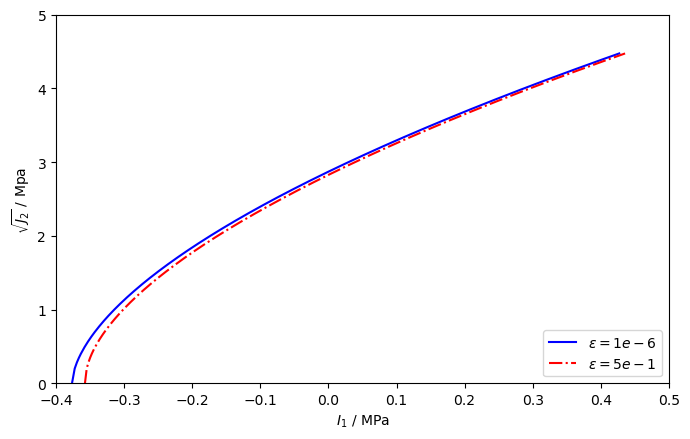

In [7]:
from sympy import symbols
from numpy import linspace, sqrt
from sympy import lambdify
import matplotlib.pyplot as mpl
import math
import sympy as sp

m_i = 1.
gsi = 10.0
sigma_ci = 1e3
a = 0.5
Df = 0.0
m_b = m_i * np.exp((gsi - 100.0) / (28.0 - 14.0 * Df))
s = np.exp((gsi - 100.0) / (9 - 3.0 * Df))
a = (1.0 / 2.0) + (1.0 / 6.0) * (np.exp(-gsi / 15.0) - np.exp(-20.0 / 3.0))
eps1 = float(1e-6)
eps2 = float(5e-1)
lode = 60.0 * math.pi / 180
J2 = symbols("J2")
p1 = (
    1.0
    * (
        (2.0 * sp.sqrt(J2 + eps1 * eps1) * cos(lode)) ** (1 / a)
        + m_b
        * sp.sqrt(J2 + eps1 * eps1)
        * sigma_ci ** (1 / a - 1)
        * (cos(lode) - sin(lode) / sqrt(3))
        - s * sigma_ci ** (1 / a)
    )
    / (m_b * sigma_ci ** (1 / a - 1))
)
lam_x1 = lambdify(J2, p1, modules=["numpy"])

p2 = (
    1.0
    * (
        (2.0 * sp.sqrt(J2 + eps2 * eps2) * cos(lode)) ** (1 / a)
        + m_b
        * sp.sqrt(J2 + eps2 * eps2)
        * sigma_ci ** (1 / a - 1)
        * (cos(lode) - sin(lode) / sqrt(3))
        - s * sigma_ci ** (1 / a)
    )
    / (m_b * sigma_ci ** (1 / a - 1))
)
lam_x2 = lambdify(J2, p2, modules=["numpy"])


fig, ax = plt.subplots(figsize=(7, 4.5))
x_vals = linspace(0, 20, 500)
y_vals1 = lam_x1(x_vals)
y_vals2 = lam_x2(x_vals)
print(y_vals1)
print(y_vals2)

ax.plot(y_vals1 / 3.0, sqrt(x_vals), "b-", label="$\epsilon=1e-6$")
ax.plot(y_vals2 / 3.0, sqrt(x_vals), "r-.", label="$\epsilon=5e-1$")

ax.set_ylim(0, 5)
ax.set_xlim(-0.4, 0.5)
legend = ax.legend(loc="lower right", fontsize="medium")

ax.set_xlabel("$I_1$ / MPa")
ax.set_ylabel("$\sqrt{J_2}$ / Mpa")

fig.tight_layout()